# Ejercicio. Del archivo fve32.mat


### Muestra el heatmap de la matriz de activación

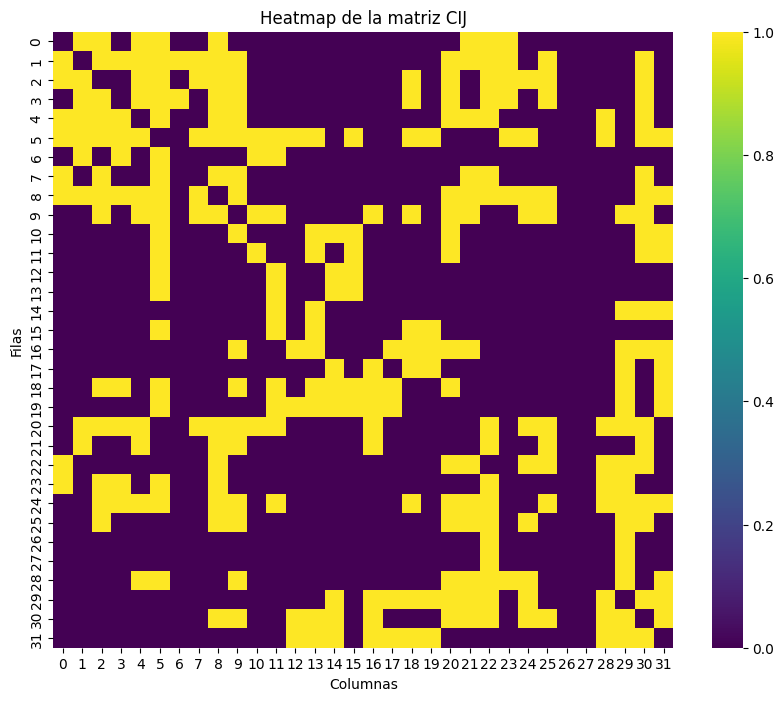

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns

data = scipy.io.loadmat('fve32.mat')

activation_matrix = data['CIJ']

plt.figure(figsize=(10, 8))
sns.heatmap(activation_matrix, cmap="viridis", cbar=True)
plt.title("Heatmap de la matriz CIJ")
plt.xlabel("Columnas")
plt.ylabel("Filas")
plt.show()

### Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)

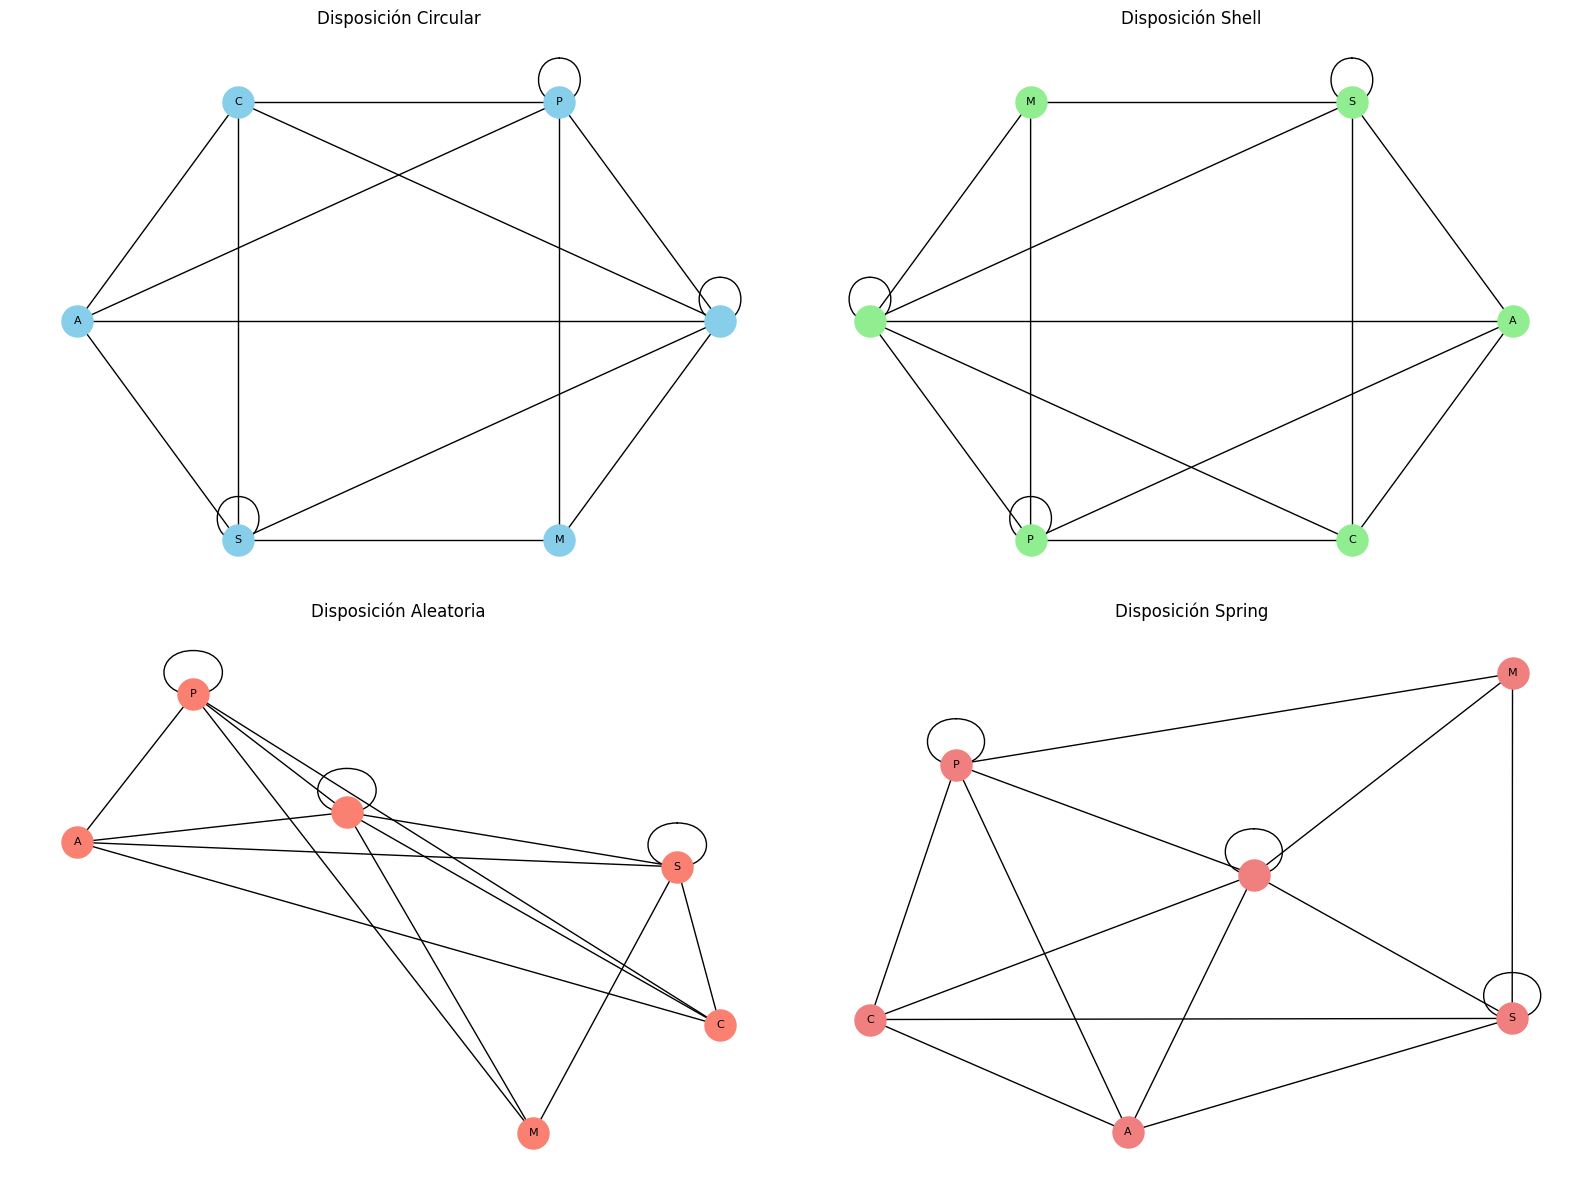

In [2]:
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt

data = scipy.io.loadmat('fve32.mat')

adj_matrix = data['CIJ']
node_names = [name[0] for name in data['Names'].flatten()]

G = nx.from_numpy_array(adj_matrix)
G = nx.relabel_nodes(G, dict(enumerate(node_names)))

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
nx.draw_circular(G, with_labels=True, node_size=500, node_color="skyblue", font_size=8)
plt.title("Disposición Circular")

plt.subplot(2, 2, 2)
nx.draw_shell(G, with_labels=True, node_size=500, node_color="lightgreen", font_size=8)
plt.title("Disposición Shell")

plt.subplot(2, 2, 3)
nx.draw_random(G, with_labels=True, node_size=500, node_color="salmon", font_size=8)
plt.title("Disposición Aleatoria")

plt.subplot(2, 2, 4)
nx.draw_spring(G, with_labels=True, node_size=500, node_color="lightcoral", font_size=8)
plt.title("Disposición Spring")

plt.tight_layout()
plt.show()

### Determina el nodo con mayores conexiones


In [3]:
node_degrees = dict(G.degree())

max_node = max(node_degrees, key=node_degrees.get)
max_degree = node_degrees[max_node]

print(f"El nodo con más conexiones es: {max_node} con {max_degree} conexiones.")


El nodo con más conexiones es:   con 7 conexiones.


### Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior

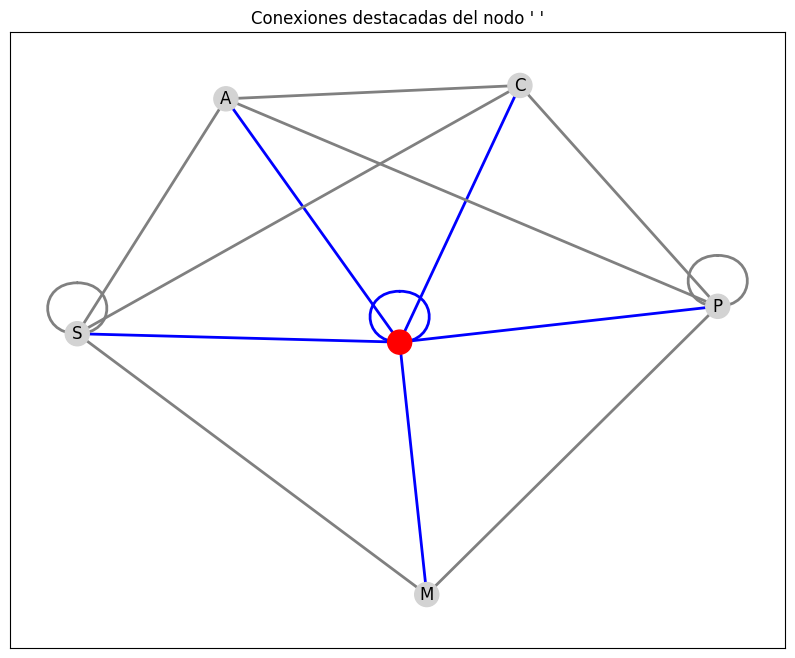

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

edges_to_highlight = [(max_node, neighbor) for neighbor in G.neighbors(max_node)]

edge_colors = ["gray" if edge not in edges_to_highlight else "blue" for edge in G.edges()]

node_colors = ["lightgray" if node != max_node else "red" for node in G.nodes()]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
nx.draw_networkx_labels(G, pos)

plt.title(f"Conexiones destacadas del nodo '{max_node}'")
plt.show()